# Image Augmentation

Data augmentation is a method of creating more training data from current training samples by augmenting them with a series of random transformations that produce believable-looking visuals. Image augmentation builds training images artificially by using various processing methods or a mix of numerous processing methods, such as random rotation, shifts, shear and flips, and so on.

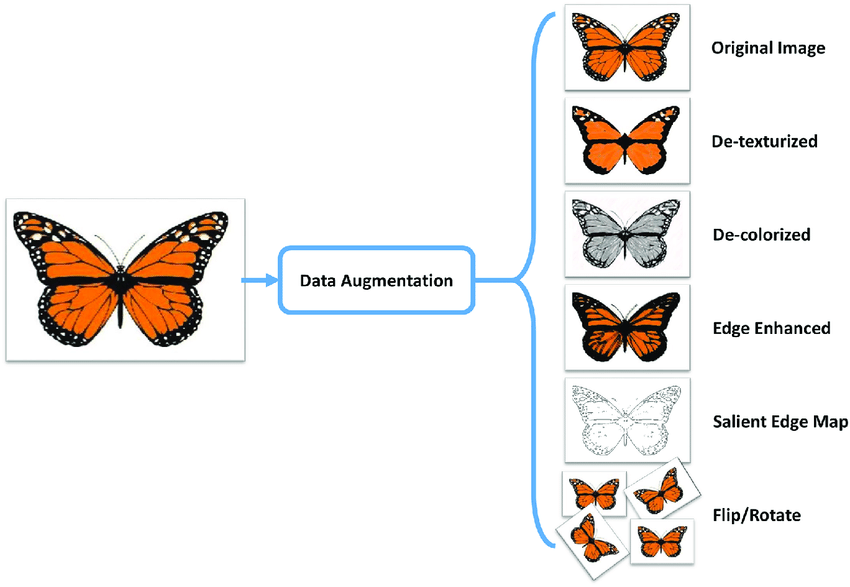

Image Augmentation is used to prevent from overfitting which is cause by having too few samples. In Keras, this is accomplished by specifying a set of random modifications to be applied to images read by the ImageDataGenerator instance. In addition to the conventional data augmentation techniques given by Keras ImageDataGenerator, we can generate enhanced images using custom functions.

Types of Custom Functions
1. Feature Standardization
2. ZCA Whitening
3. Random Rotations
4. Random Shifts
5. Random Flips
6. Random Zoom

# Point of Comparison for Image Augmentation

For this example we will be using MNIST handwritten digit recognition task. We will take a look at the first 9 images in the training dataset

###### (Before Running the Code below, Please Restart Kernel)

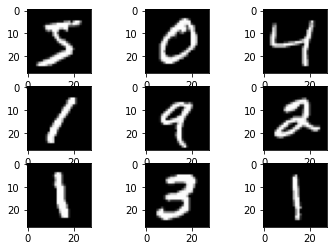

In [1]:
#Library
from keras.datasets import mnist
from matplotlib import pyplot

#Load Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Create a grid of 3x3 images
for i in range (0,9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))

#show plot
pyplot.show()

###### Coding Reference: https://machinelearningmastery.com/image-augmentation-deep-learning-keras/

# Feature Standardization

The ability to normalize pixel values throughout the full dataset is also available. This is known as feature standardization, and it is similar to the type of standardization that is frequently performed for each column in a tabular dataset. Feature standardization can be perform by setting the featurewise_center and  featurewise_std_normalization arguments on the ImageDataGenerator class. These are, in fact, set to True by default, and invoking ImageDataGenerator with no arguments has the same effect.

###### (Before Running the Code below, Please Restart Kernel)

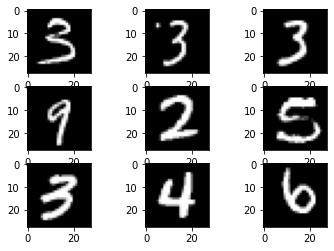

In [1]:
# Standardize images across the dataset, mean=0, stdev=1
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

#load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# fit parameters from data
datagen.fit(X_train)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    
    #create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    
    #show plot
    pyplot.show()
    break

Running this example allowed you to see the effect of darkening and lightening of different digits.

###### Coding Reference: https://machinelearningmastery.com/image-augmentation-deep-learning-keras/

# ZCA Whitening

A whitening transform is a linear algebra method that removes redundancy in a pixel image matrix. Less redundancy in the image is designed to help the learning process better highlight the image's structures and features. ZCA Whitening can be perform by setting zca_whitening argument to True.

###### (Before Running the Code below, Please Restart Kernel)

C:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\keras_preprocessing\image\image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


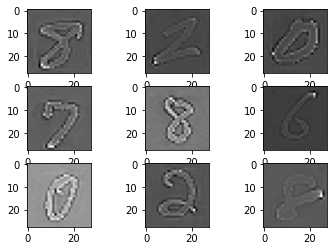

In [2]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

datagen = ImageDataGenerator(zca_whitening=True)

datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    
    for i in range(0, 9):
        pyplot.subplot(330 + 1+ i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
        
    pyplot.show()
    break

###### Coding Reference: https://machinelearningmastery.com/image-augmentation-deep-learning-keras/

# Random Rotations

Images in your sample data may have changing and different rotations in the scene at times. By artificially and randomly rotating photos from your dataset during training, you may train the model to handle image rotations even better.

###### (Before Running the Code below, Please Restart Kernel)

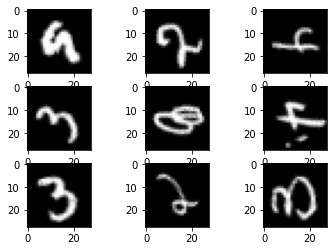

In [2]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

datagen = ImageDataGenerator(rotation_range=90)

datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28,28), cmap=pyplot.get_cmap('gray'))
        
    pyplot.show()
    break

The photos have been rotated left and right up to a maximum of 90 degrees, as you can see. This is not useful for this task because the MNIST digits have a normalized orientation, but it may be useful for learning from images where the objects have varied orientations.

###### Coding Reference: https://machinelearningmastery.com/image-augmentation-deep-learning-keras/

# Random Flips

Making random flips of images in your training data is another augmentation to your image data that can increase performance on huge and difficult tasks. Vertical_flip is use for random flipping along vertical axes and horizontal_flip is used for random flipping along horizontal axes.

###### (Before Running the Code below, Please Restart Kernel)

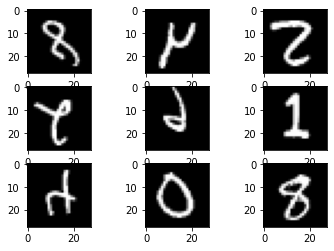

In [3]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
        
    pyplot.show()
    break

The data presented above has been flipped. This is not very effective for digit data, but it may be useful for other situations involving photos of objects in a setting with varying orientations.

###### Coding Reference: https://machinelearningmastery.com/image-augmentation-deep-learning-keras/

# Fill Mode

Fill mode is used to fill in newly produced pixels that may have appeared as a result of a rotation or a width/height change. To use Fill mode, the code is written as fill_mode ={'constant','nearest','reflect' or 'wrap}. The default is 'nearest. Below is are images after being Augmented.

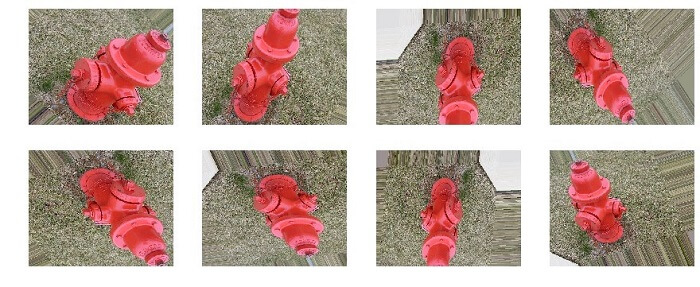

###### Image Reference (https://software.intel.com/content/www/us/en/develop/articles/hands-on-ai-part-14-image-data-preprocessing-and-augmentation.html?utm_source=ISTV&utm_medium=Video&utm_campaign=ISTV2019_ISTV1910)

# Random Zoom Range

Zoom range is used to randomly applying zooming inside pictures. To use zoom range, the code is written as zoom_range = '0.1'.

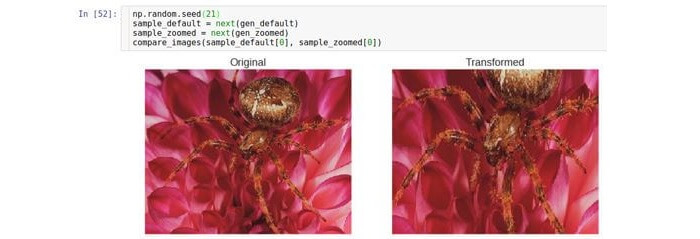

###### Image Reference (https://software.intel.com/content/www/us/en/develop/articles/hands-on-ai-part-14-image-data-preprocessing-and-augmentation.html?utm_source=ISTV&utm_medium=Video&utm_campaign=ISTV2019_ISTV1910)

# Width and Height shift

width_shift and height_shift are ranges (as a percentage of total width or height) for randomly translating images vertically or horizontally. To use width shift and height shift, the code is width_shift = '0.4', height_shift = '0.4'

# Example of Augmented Images

Below is an original image of a Red Panda which haven't been Augmented yet

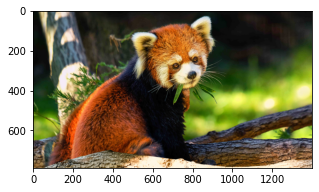

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image=mpimg.imread('./images/red_panda.png')
plt.figure(figsize=(5,5))
imgplot = plt.imshow(image)

plt.show()

Here is where we process Original Images and Augmented them to get more images for our dataset. We are going to add Rotation, shift, zoom, flip, shear and fill to our images. The Augmented images will then be save into save_to_dir files.

###### Coding Reference: https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [10]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('./images/red_panda.png')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1,
                         save_to_dir='preview', save_prefix='panda', save_format='png'):
    i += 1
    if i > 20:
        break

Below are Augmented Images that we have processed

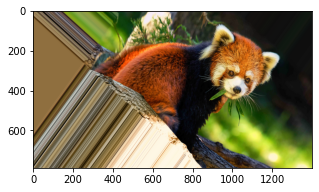

In [14]:
image_preview=mpimg.imread('./preview/panda_0_2365.png')
plt.figure(figsize=(5,5))
imgplot = plt.imshow(image_preview)

plt.show()

# Making Data Augmentation Generator

Here we can make our own data augmentation generator for our existed data. The below code is an example to generate Augmented images.

###### (Before Running the Code below, Please Restart Kernel)

#### (STEP 1) Library

This is where we define all used library for our Data Augmentation Generator. uuid is used to put unique id on the Augmented data to avoid repeated Augmented images.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import uuid

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

#### (STEP 2)  Image Data Generator

This is where we can define the data preparation whether we want to flip, rotate, zoom, and etc.

In [5]:
datagen = ImageDataGenerator(
        rotation_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        )

#### (STEP 3) Image Path File
This step is where we define our images file path for us to augmented the images.

In [ ]:
IMAGES_PATH = 'insert file path here' 

#### (STEP 4) Label or Classes

In case we have more than 1 classes, we can insert our Labels or class types here for it to access every images in the file

In [ ]:
label = ['Insert label or type of classes here to label your augmented images']

#### (STEP 5) Data Augmentation Process

This step is where the images will start to be Augmented and will be save into a new file directory (It is recommended to create a new file for Augmented images). Save_prefix can be change to something else up to you. Save_format can be change to any type from JPG to PNG with a unique id included for each Augmented images.

In [ ]:
# Run this for data Augmentation
i = 0
for batch in datagen.flow_from_directory(directory='insert file path here',
                                        batch_size=50,
                                        target_size=(320,320),
                                        color_mode='grayscale',
                                        save_to_dir='insert save file path here',
                                        save_prefix='aug',
                                        save_format='jpg'.format(str(uuid.uuid1))): # Gives unique id for each augmented images
    i += 1
    if i > 31:
        break